In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv(
    'data/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df = df.dropna(subset=['Medal'])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [5]:
df1= df.groupby('NOC', as_index=False)[['Age', 'Height', 'Weight']].mean()
df1.head()

,NOC,Age,Height,Weight
0,AFG,23.000000,183.000000,63.000000
1,AHO,19.000000,NaN,NaN
2,ALG,24.117647,172.733333,64.933333
3,ANZ,24.068966,176.916667,72.500000
4,ARG,26.423358,176.379464,73.513636


In [6]:
cal = df['NOC'].value_counts()
cal = cal.reset_index()

cal.columns=['NOC1','Medal']
cal.head()

,NOC1,Medal
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777


In [7]:
df2 = pd.merge(df1, cal, left_on='NOC', right_on='NOC1', how='left').drop('NOC1', axis=1)
df2.head()

,NOC,Age,Height,Weight,Medal
0,AFG,23.000000,183.000000,63.000000,2
1,AHO,19.000000,NaN,NaN,1
2,ALG,24.117647,172.733333,64.933333,17
3,ANZ,24.068966,176.916667,72.500000,29
4,ARG,26.423358,176.379464,73.513636,274


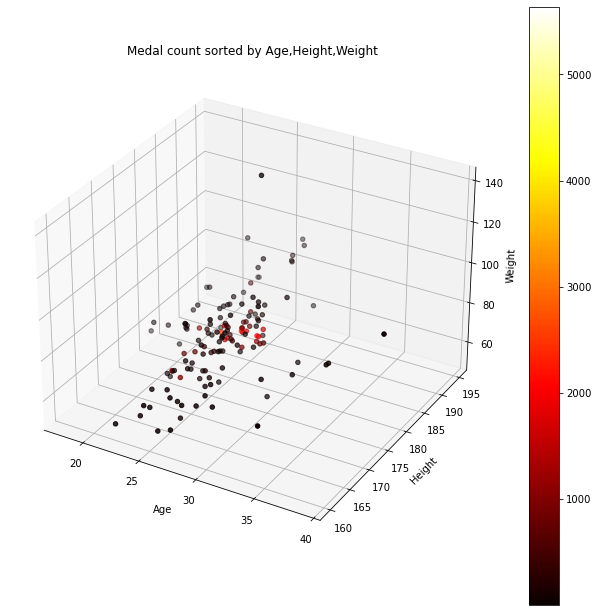

In [8]:
fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot( projection='3d')


x = df2.Age
y = df2.Height
z = df2.Weight
c = df2.Medal



img = ax.scatter(x, y, z,c=c, cmap=plt.hot())
ax.set_xlabel('Age')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('Medal count sorted by Age,Height,Weight')
fig.colorbar(img)
plt.show()